# 📊 ПРОЕКТ 📈 

# ОПРЕДЕЛЕНИЕ ВОЗРАСТА ПОКУПАТЕЛЕЙ 🔞

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Анализ-обученной-модели" data-toc-modified-id="Анализ-обученной-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ обученной модели</a></span></li><li><span><a href="#Чек-лист" data-toc-modified-id="Чек-лист-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист</a></span></li></ul></div>

## Исследовательский анализ данных

<div style="border:solid green 2px; padding: 5px">

импортируем библиотеки:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<div style="border:solid green 2px; padding: 5px">

загружаем файл, выводим краткую информацию и первые 5 строчек:

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')

labels.info()
labels.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


<div style="border:solid green 2px; padding: 5px">

выведем информацию подробнее при помощи describe:

In [3]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


<div style="border:solid green 2px; padding: 5px">

посмотрим на размер выборки:

In [4]:
labels.shape

(7591, 2)

<div style="border:solid green 2px; padding: 5px">

построим график распределения возраста в выборке:

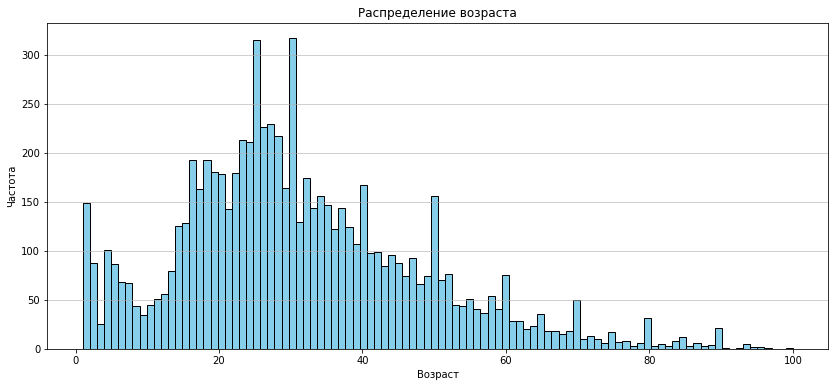

In [5]:
plt.figure(figsize=(14, 6))
plt.hist(labels['real_age'], bins=100, color='skyblue', edgecolor='black')
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid(axis='y', alpha=0.75)
plt.show()

<div style="border:solid green 2px; padding: 5px">

Видим, что выборка распределена от 1 года до 100 лет, большинство фотографий с людьми 20-35 лет, многие фотографии повёрнуты и/или сдвинуты, что надо будет учесть при обучении модели

<div style="border:solid green 2px; padding: 5px">

создадим загрузчик файлов:

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


<div style="border:solid green 2px; padding: 5px">

напечатаем на экране 12 фотографий и посмотрим, как устроен датасет:

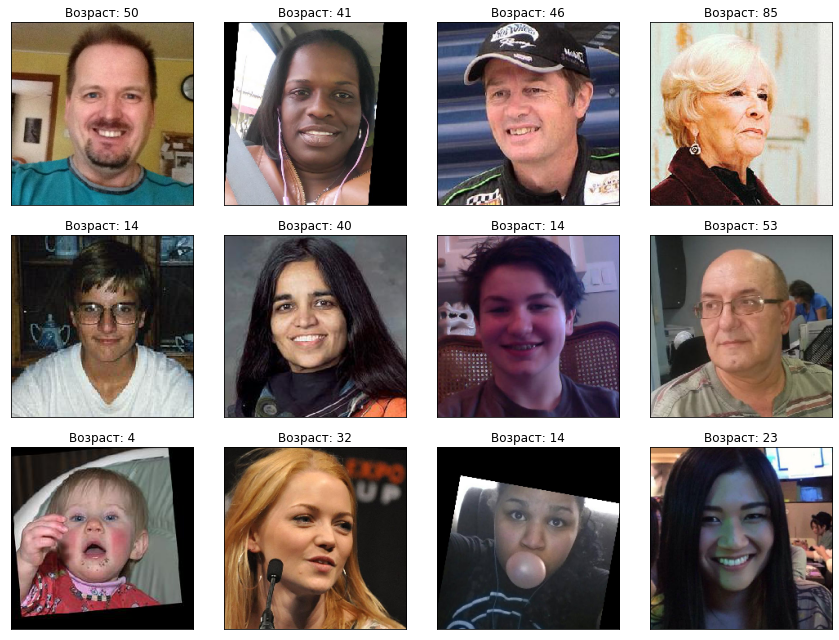

In [7]:
features, target = next(train_gen_flow)

fig, axs = plt.subplots(3, 4, figsize=(12, 9))
axs = axs.ravel()
for i in range(12):
    axs[i].imshow(features[i])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(f'Возраст: {target[i]}')
plt.tight_layout()
plt.show()

<div style="border:solid green 3px; padding: 15px"> 
    
Промежуточный вывод:
    
1. подгрузили необходимые библиотеки;
2. изучили файлы;
3. построили график распределения;
4. создали загрузчик фото;
5. напечатали на экране датасет из случайных 12 фотографий.


## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

import pandas as pd
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential

def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(validation_split=0.25,
                                       rescale=1./255,
                                       rotation_range=20,
                                       width_shift_range=0.1, 
                                       height_shift_range=0.1
    )

    train_datagen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345
    )

    return train_datagen_flow

def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(validation_split=0.25,
                                      rescale=1./255)

    test_datagen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345
    )

    return test_datagen_flow

def create_model(input_shape):
    backbone = ResNet50(weights='imagenet',
                    input_shape=(224,224,3),
                    include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(12, activation='relu'))

    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

def train_model(model, train_datagen_flow, test_datagen_flow, batch_size=None, epochs=10, steps_per_epoch=None, validation_steps=None):
    model.fit(train_datagen_flow,
              validation_data=test_datagen_flow,
              batch_size=batch_size,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2,
              shuffle=True)
    return model

```

```

Train for 178 steps, validate for 60 steps
Epoch 1/10
2024-04-16 13:13:20.399227: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-04-16 13:13:20.977240: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 101s - loss: 383.7033 - mae: 14.6416 - val_loss: 875.2460 - val_mae: 24.7148
Epoch 2/10
178/178 - 94s - loss: 98.1427 - mae: 7.4260 - val_loss: 923.6541 - val_mae: 25.5782
Epoch 3/10
178/178 - 94s - loss: 73.0002 - mae: 6.4719 - val_loss: 277.9897 - val_mae: 12.3328
Epoch 4/10
178/178 - 93s - loss: 55.1696 - mae: 5.6514 - val_loss: 130.8012 - val_mae: 8.5643
Epoch 5/10
178/178 - 93s - loss: 47.0176 - mae: 5.2809 - val_loss: 101.3799 - val_mae: 7.6540
Epoch 6/10
178/178 - 94s - loss: 38.7514 - mae: 4.7826 - val_loss: 69.7843 - val_mae: 6.1269
Epoch 7/10
178/178 - 94s - loss: 32.7490 - mae: 4.4362 - val_loss: 89.9369 - val_mae: 6.8582
Epoch 8/10
178/178 - 99s - loss: 29.0903 - mae: 4.1707 - val_loss: 71.6324 - val_mae: 6.2532
Epoch 9/10
178/178 - 100s - loss: 25.5198 - mae: 3.9412 - val_loss: 66.5573 - val_mae: 6.0598
Epoch 10/10
178/178 - 100s - loss: 24.2812 - mae: 3.8314 - val_loss: 67.9562 - val_mae: 6.1493
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
60/60 - 11s - loss: 67.9562 - mae: 6.1493
Test MAE: 6.1493

```

## Анализ обученной модели

<div style="border:solid green 2px; padding: 5px">
    
Попробуем свизуализировать полученные данные; перенесём выходные результаты обучения модели в отдельные датафреймы, создадим на их основании два графика с прогрессом потерь и метрики MAE по эпохам:

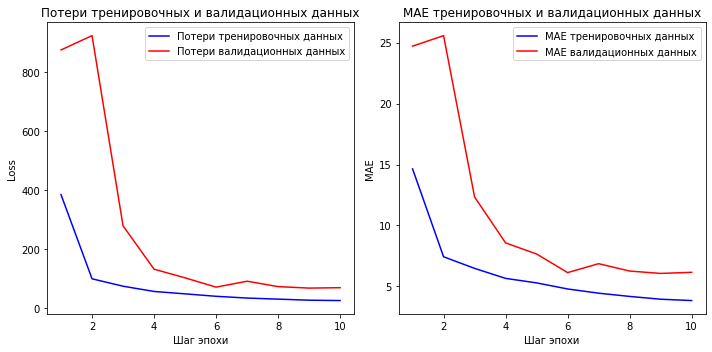

In [10]:
epochs = range(1, 11)  

training_loss = [383.7033, 98.1427, 73.0002, 55.1696, 47.0176, 38.7514, 32.7490, 29.0903, 25.5198, 24.2812]
validation_loss = [875.2460, 923.6541, 277.9897, 130.8012, 101.3799, 69.7843, 89.9369, 71.6324, 66.5573, 67.9562]

training_mae = [14.6416, 7.4260, 6.4719, 5.6514, 5.2809, 4.7826, 4.4362, 4.1707, 3.9412, 3.8314]
validation_mae = [24.7148, 25.5782, 12.3328, 8.5643, 7.6540, 6.1269, 6.8582, 6.2532, 6.0598, 6.1493]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'b', label='Потери тренировочных данных')
plt.plot(epochs, validation_loss, 'r', label='Потери валидационных данных')
plt.title('Потери тренировочных и валидационных данных')
plt.xlabel('Шаг эпохи')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, training_mae, 'b', label='MAE тренировочных данных')
plt.plot(epochs, validation_mae, 'r', label='MAE валидационных данных')
plt.title('MAE тренировочных и валидационных данных')
plt.xlabel('Шаг эпохи')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

<div style="border:solid green 2px; padding: 5px">
    
Можем наблюдать, что в первые две эпохи модель была плохо обучена и показывала высокий процент потерь (ошибок), далее модель резко ловит позитивную волну, и уже на 5 эпохе модель доходит до целевого значения метрики MAE валидационных данных (менее 8).
    
Лучший показатель MAE был показан на 9 эпохе и составил 6.059

<div style="border:solid green 4px; padding: 15px"> 

# Итоговый вывод:
    
1. Провели подготовку данных:
    
    а) Подгрузили необходимые библиотеки;
    
    б) Изучили файлы для работы, создали загрузчик фотографий;
    
    в) Провели визуализацию в виде графика и отобразили датасет из фото;
    
2. Провели обучение модели:
    
    а) Создали функции def load_train, def load_test, def create_model, def train_model;
    
    б) Выбрали модель ResNet50, поделили данные, подобрали слои и гиперпараметры;
    
    в) Обучили модель и вывели результат обучения;
    
3. Провели анализ обученной модели:
    
    а) Перенесли данные обученной модели в датафреймы;
    
    б) Визуализировали полученные данные;
    
    в) Подвели итог обучения;
    
ЗАКЛЮЧЕНИЕ: Модель ResNet50 успешно обучилась определению возраста людей на фотографиях, достигнув наилучшего результата MAE в 6.059 на 9 эпохе, что подходит под требования заказчика (MAE не выше 8), а значит, данную модель можно смело использовать в системе фотофиксации сетевого супермаркета.

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы